# Hierarchical clustering

In [2]:
!git clone https://github.com/LukeSmithxyz/based.cooking ~/Downloads/based.cooking


Cloning into '/Users/max/Downloads/based.cooking'...
remote: Enumerating objects: 5980, done.
remote: Counting objects: 100% (5980/5980), done.
remote: Compressing objects: 100% (2361/2361), done.
remote: Total 5980 (delta 3694), reused 5613 (delta 3525), pack-reused 0
Receiving objects: 100% (5980/5980), 30.69 MiB | 2.28 MiB/s, done.
Resolving deltas: 100% (3694/3694), done.


In [3]:
!ls ~/Downloads/based.cooking/content/


_index.md
aelplermagronen.md
aglio-e-olio.md
aljotta.md
almeirim-stone-soup.md
apple-chicken.md
apple-pie.md
apple-strudel.md
ardei-umpluti.md
arroz-chaufa.md
asian-style-chicken-sticky-sauce.md
assam-tea.md
aussie-snags.md
autumn-soup.md
babas-feta-pasta.md
baby-back-ribs.md
baked-mostaccioli.md
baked-pasta-with-broccoli.md
baked-salmon.md
banana-bread.md
banana-muffins-with-chocolate.md
banana-oatmeal-cookies.md
banana-pancakes.md
basic-meatballs.md
bean-salad.md
beef-and-broccoli.md
beef-goulash.md
beef-jerky.md
beef-kidney.md
beef-stew.md
beef-tips.md
beef-wellington.md
belgian-pear-syrup.md
bloody-mary-mix.md
bolinhos-de-coco.md
bolo-do-caco.md
bolognese-sauce.md
bread.md
breakfast-wrap.md
breton-crepes.md
brigadeiro.md
broiled-trevally.md
brown-sauce.md
burger-dressing.md
butter-based-biscuit.md
butter-chicken-masala.md
cacio-e-pepe.md
caesar-salad.md
cannellini-bean-salad.md
carbonade.md
carbonara.md
ceviche.md
challah-bread.md
cheddar-crusted-chicken.md
cheese.md
cheesy-meatbal

https://platform.openai.com/docs/guides/embeddings/what-are-embeddings

In [6]:
import os
import pathlib
import requests
from tqdm import tqdm
import dotenv

dotenv.load_dotenv('../../.env')
api_token = os.environ['OPEN_AI_API_KEY']
api_url = 'https://api.openai.com/v1/embeddings'
headers = {'Authorization': f'Bearer {api_token}'}

embeddings = {}
recipe_dir = pathlib.Path('~/Downloads').expanduser() / 'based.cooking' / 'content'
recipe_paths = list(recipe_dir.glob('*.md'))
recipe_paths = [path for path in recipe_paths if '_index' not in path.stem]

for path in tqdm(recipe_paths):

    recipe_name = path.stem
    recipe_instructions = path.read_text()

    response = requests.post(
        api_url,
        headers=headers,
        json={'input': recipe_instructions, 'model': 'text-embedding-ada-002'}
    )

    embedding = response.json()['data'][0]['embedding']
    embeddings[recipe_name] = embedding

embeddings_df = pd.DataFrame(embeddings).T
embeddings_df.to_csv('../../data/recipe_embeddings.csv')


100%|██████████| 349/349 [04:39<00:00,  1.25it/s]


In [8]:
embeddings_df.shape


(349, 1536)

In [202]:
embeddings_df = pd.read_csv('../../data/recipe_embeddings.csv', index_col=0)
embeddings_df.sample(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
pozharskiye-cutlets,-0.004898,-0.001670,-0.009761,-0.005958,-0.000502,-0.004779,-0.002810,-0.048698,-0.037337,-0.052548,0.025312,0.028959,-0.052277,0.013307,-0.019197,0.043384,0.029203,0.014032,0.021353,-0.047342,-0.021868,0.015035,-0.003735,-0.019645,-0.014520,0.006318,0.028850,-0.019658,-0.009660,-0.002922,0.018208,-0.004264,-0.008772,-0.003252,-0.020458,-0.008894,0.009070,0.004050,0.038015,-0.002295,0.032456,-0.005315,-0.017055,0.004094,-0.004887,0.013205,0.003884,-0.013429,-0.013185,0.029664,0.040699,0.005931,0.004996,-0.012175,-0.019509,-0.001340,0.011985,0.013666,0.002706,-0.021204,0.018316,0.003786,-0.008690,0.001244,-0.006918,-0.003596,-0.009538,-0.000446,-0.022329,0.005836,0.024295,0.020594,0.011436,-0.011246,0.037988,-0.004288,-0.013361,0.007701,0.009361,-0.029582,0.032972,0.005694,0.002262,0.036578,-0.002647,-0.001995,-0.011653,0.028091,-0.018980,-0.003247,0.007030,0.030016,0.011781,-0.001673,-0.018858,-0.001368,-0.008745,0.030938,-0.014927,-0.033161,-0.000616,-0.007172,-0.015618,-0.014330,-0.005813,-0.016581,0.003830,-0.039425,0.014900,0.011829,-0.009599,0.015049,0.004328,-0.039371,0.020567,0.009090,-0.010710,-0.021787,-0.016418,-0.008812,0.006033,0.034734,-0.010053,-0.012358,0.033324,-0.019509,0.017665,-0.008867,0.010202,-0.001712,0.075271,-0.010670,0.004077,-0.011680,0.010154,0.018601,-0.021272,0.000075,-0.011788,-0.024498,0.007565,0.029772,0.002505,0.002928,-0.005253,0.034192,-0.015591,0.028931,-0.035059,-0.001697,0.022844,-0.010121,0.038205,-0.016906,0.020228,-0.003555,-0.012459,0.018208,-0.001024,-0.008507,0.007572,0.013727,-0.007938,-0.001411,0.026396,0.009829,0.036985,-0.011937,0.009517,-0.011788,0.013266,-0.015320,-0.051952,0.024769,-0.004077,0.019075,-0.012114,-0.011436,-0.023671,0.014276,-0.006304,-0.004508,0.029257,0.044902,0.018750,-0.026112,0.019577,-0.013625,-0.025637,-0.004193,0.009883,0.010941,0.

In [120]:
embeddings_df.shape


(349, 1536)

In [122]:
len(embeddings_df.columns)


1536

That's a lot of columns. Let's try to reduce the dimensionality of the data using PCA. We'll take a look at the explained variance ratio to see how many components we should keep.

In [9]:
import prince

pca = prince.PCA(n_components=len(embeddings_df.columns))
pca.fit(embeddings_df)
pca.eigenvalues_summary.iloc[::20]


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,80.054,5.21%,5.21%
20,16.881,1.10%,44.02%
40,9.193,0.60%,59.76%
60,6.293,0.41%,69.59%
80,4.458,0.29%,76.46%
100,3.397,0.22%,81.50%
120,2.640,0.17%,85.39%
140,2.111,0.14%,88.46%
160,1.694,0.11%,90.91%


In [11]:
projections = prince.PCA(n_components=100).fit_transform(embeddings_df)
projections = pd.DataFrame(projections, index=embeddings_df.index)
projections.head()


component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
creamy-mashed-potatoes,4.253446,6.614723,-4.265086,8.811997,-10.653575,14.387325,-2.133943,-9.120286,-4.437255,-7.694949,-2.985569,4.009200,3.439092,-4.799838,3.886289,-8.411849,2.210481,3.422052,-1.146751,0.191957,2.422692,-3.017622,-0.337390,2.223715,-2.807210,-3.759325,-3.589097,-2.982745,7.096868,-0.057060,-2.282584,-1.725709,4.763925,0.056980,-0.031624,-4.186145,1.761985,-3.467511,-1.389295,-0.073663,-3.015085,2.532772,2.942682,0.550936,-0.323602,-0.202441,-4.678735,-0.215063,0.240339,-4.695525,1.792446,-2.499883,-2.578306,1.022588,1.201093,1.124348,-1.680077,0.094926,-0.007714,-1.626300,1.361972,2.381104,-0.485452,-1.806308,-1.604697,-0.348560,-1.130193,0.358421,-1.084292,0.821343,-0.709413,-1.542587,-0.709883,0.744267,-2.281507,-1.294961,1.581367,-2.198142,0.366603,-1.320363,0.393039,1.574415,-1.072366,-1.353048,0.595042,0.656395,0.888098,0.476316,-0.571884,0.108516,1.218082,-1.206631,3.608609,-0.500605,1.029113,-1.165602,-0.460609,-0.443624,1.743600,0.769620
red-sauce,-14.572437,11.677713,-1.577330,0.299709,7.671692,-6.228192,-3.838327,-2.166822,-2.947866,-1.090854,1.874938,5.592953,-5.031367,-3.925088,-3.711597,-3.418237,3.697588,-0.489894,-3.371974,0.396474,-2.242092,4.530952,1.750998,5.870410,-2.186262,-0.003551,3.898712,-4.901573,-8.475536,-1.201448,1.038880,1.944583,4.455330,-6.795221,-0.507471,-3.672954,-2.816954,-1.214912,-2.721559,-0.462518,-1.158537,-0.935731,-1.413390,1.417824,-1.297656,0.498519,-3.953783,-7.147917,0.100598,0.942140,-0.687535,2.419854,0.355012,-1.549802,1.014670,-0.539890,-0.338660,0.842018,-1.388595,0.413173,0.289455,2.200469,1.368914,0.925187,3.788868,4.737424,-0.334883,-0.054495,2.325530,-1.670095,1.600803,4.333301,-1.632235,-3.747173,2.325619,-1.453009,-1.426063,-1.138919,-0.858661,-1.596646,-3.397103,1.225609,-0.497401,-2.191711,5.930506,2.150508,-0.224480,-2.873540,-3.561305,-2.273231,1.648248,-0.775802,0.519465,-0.915259,0.778799,0.422140,0.535580,1.980121,-1.390926,-0.580575
turmeric-flatbread,5.612971,-6.520492,-4.026572,-9.726595,-1.443337,-9.428109,13.250663,7.128749,7.315576,1.782861,-6.778739,6.497310,-4.167527,3.112747,2.185398,2.463240,-0.146721,-2.989505,5.018276,-1.745786,3.082391,2.242186,-0.668151,-4.032787,2.633036,2.338216,0.826689,-4.739005,-2.708833,3.050269,-3.451208,0.754910,4.591062,0.983118,-1.275879,-6.432785,0.906548,7.580818,-0.764925,2.249333,-0.044412,2.418738,1.261974,-5.407735,1.262156,0.719555,-0.616593,1.025759,0.414725,0.486024,1.880611,0.196872,0.525692,-2.579833,6.724030,4.835791,0.118063,-1.114646,3.842965,0.331409,0.068056,1.969079,5.117351,3.182139,2.048307,1.460234,-2.584178,-2.407163,3.090119,1.455663,1.742004,1.257303,1.873307,-2.397903,1.261356,-2.013580,-2.417151,2.178751,-0.020582,-2.140215,-3.708669,0.349336,-1.282457,-3.036507,3.581209,-1.587397,1.115075,1.184079,1.726292,-2.706841,-0.418084,-0.431450,0.302418,2.062670,0.855715,-0.683747,-1.696448,-1.029083,-2.297565,0.229538
zurich-sytle-meat-saute,-7.185276,4.682124,0.791489,12.404258,-1.024709,-4.283382,-5.679573,-4.144990,6.250476,6.272069,-4.983769,1.641749,-4.099116,4.167372,-0.026773,3.308951,4.891485,2.874964,4.454100,-1.624287,1.736907,-0.796985,-1.626662,4.613875,7.839502,-4.882115,5.921154,-0.826293,-0.234735,3.522130,-2.553468,1.471443,-4.192603,-1.073808,3.678657,0.720884,-1.722018,-3.719475,5.292389,-0.232554,-3.467999,0.918448,-2.991232,1.059586,-0.031073,-1.588265,1.876930,3.481815,2.230883,-0.315843,-5.401361,-1.635577,1.135641,4.110724,-0.439600,2.443833,-2.649496,0.100244,-6.708426,2.113297,1.974772,0.227971,-0.936703,-2.036664,1.235187,3.195212,-1.302138,-4.119497,-1.487586,-0.827770,1.595933,0.895721,1.205754,-1.224501,1.561965,-2.160823,3.011240,2.134289,1.354010,-3.140800,0.24

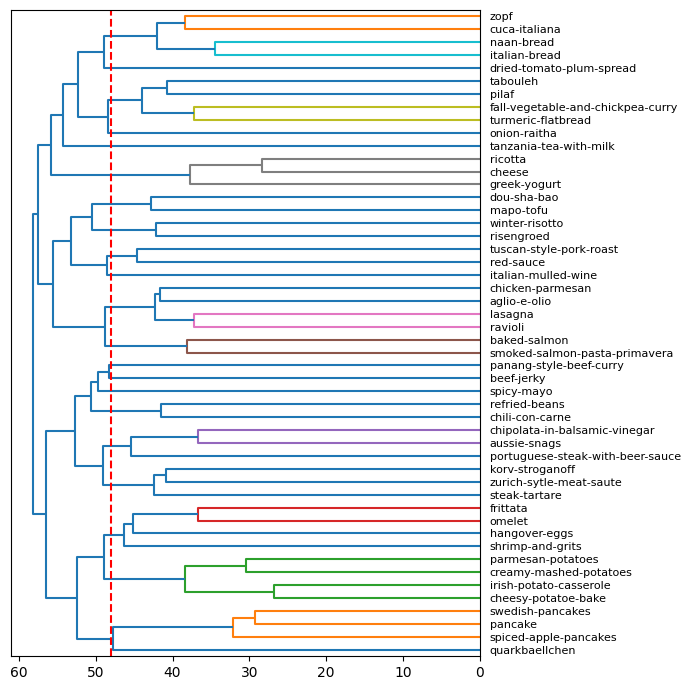

In [19]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = projections[:50]
linkage = sch.linkage(sample, 'complete')

fig = plt.figure(figsize=(7, 7))
ax = sch.dendrogram(
    linkage,
    labels=sample.index,
    orientation='left'
)
plt.tight_layout()
plt.axvline(x=48, color='red', linestyle='--')


The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a cluster and its children. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters. The cophenetic distance is the distance between the two samples in the dataset that determines the distance between the clusters. If the cophenetic distance is large then the original distance between the observations is large as well, and vice versa.

In [22]:
clusters = sch.fcluster(linkage, t=48, criterion='distance')
clusters


array([ 2, 12, 17,  4, 12, 10,  9, 14, 17, 19,  1, 21,  2, 11,  1, 15,  6,
        4, 19,  4,  3, 10,  1,  7, 18, 16, 11, 13,  6, 17, 14,  2,  1, 11,
       15,  3,  5,  5, 11,  2, 16, 17, 20,  3, 19,  3,  8,  5, 19, 16],
      dtype=int32)

In [23]:
sorted(set(clusters))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [25]:
for cluster in sorted(set(clusters)):
    cluster_recipes = sample[clusters == cluster].index.tolist()
    print(cluster_recipes)


['pancake', 'quarkbaellchen', 'spiced-apple-pancakes', 'swedish-pancakes']
['creamy-mashed-potatoes', 'cheesy-potatoe-bake', 'parmesan-potatoes', 'irish-potato-casserole']
['hangover-eggs', 'omelet', 'shrimp-and-grits', 'frittata']
['zurich-sytle-meat-saute', 'korv-stroganoff', 'steak-tartare']
['aussie-snags', 'portuguese-steak-with-beer-sauce', 'chipolata-in-balsamic-vinegar']
['chili-con-carne', 'refried-beans']
['beef-jerky']
['panang-style-beef-curry']
['spicy-mayo']
['smoked-salmon-pasta-primavera', 'baked-salmon']
['aglio-e-olio', 'ravioli', 'chicken-parmesan', 'lasagna']
['red-sauce', 'tuscan-style-pork-roast']
['italian-mulled-wine']
['risengroed', 'winter-risotto']
['mapo-tofu', 'dou-sha-bao']
['cheese', 'greek-yogurt', 'ricotta']
['turmeric-flatbread', 'pilaf', 'fall-vegetable-and-chickpea-curry', 'tabouleh']
['onion-raitha']
['italian-bread', 'naan-bread', 'cuca-italiana', 'zopf']
['dried-tomato-plum-spread']
['tanzania-tea-with-milk']


Let's say we want to organize these recipes into several directories. What should we call each directory? Let's ask ChatGPT.

In [26]:
recipe_groups = []

for cluster in sorted(set(clusters)):
    cluster_recipes = sample[clusters == cluster].index.tolist()
    recipe_groups.append(', '.join(cluster_recipes))

recipe_groups_txt = '\n'.join(f'- {rg}' for rg in recipe_groups)
print(recipe_groups_txt)


- pancake, quarkbaellchen, spiced-apple-pancakes, swedish-pancakes
- creamy-mashed-potatoes, cheesy-potatoe-bake, parmesan-potatoes, irish-potato-casserole
- hangover-eggs, omelet, shrimp-and-grits, frittata
- zurich-sytle-meat-saute, korv-stroganoff, steak-tartare
- aussie-snags, portuguese-steak-with-beer-sauce, chipolata-in-balsamic-vinegar
- chili-con-carne, refried-beans
- beef-jerky
- panang-style-beef-curry
- spicy-mayo
- smoked-salmon-pasta-primavera, baked-salmon
- aglio-e-olio, ravioli, chicken-parmesan, lasagna
- red-sauce, tuscan-style-pork-roast
- italian-mulled-wine
- risengroed, winter-risotto
- mapo-tofu, dou-sha-bao
- cheese, greek-yogurt, ricotta
- turmeric-flatbread, pilaf, fall-vegetable-and-chickpea-curry, tabouleh
- onion-raitha
- italian-bread, naan-bread, cuca-italiana, zopf
- dried-tomato-plum-spread
- tanzania-tea-with-milk


In [27]:
api_url = 'https://api.openai.com/v1/chat/completions'

prompt = f"""
I want to organize recipes into directories.
I have managed to group them together.
Now I need to name the directories.
Please provide a name for each directory.

Here are the recipe groups:

{recipe_groups_txt}

Please provide a list of names for each group.
"""

response = requests.post(
    api_url,
    headers=headers,
    json={
        'model': 'gpt-3.5-turbo',
        'messages': [{
            'role': 'user',
            'content': prompt
        }],
    }
)


In [28]:
answer = response.json()['choices'][0]['message']['content']
print(answer)


Here are the names for each recipe group:

1. Pancake Delights
2. Potato Palooza
3. Egg Extravaganza
4. Meaty Marvels
5. Global Grills
6. Mexican Fiesta
7. Jerky Joy
8. Curry Creations
9. Savory Sauces
10. Salmon Sensations
11. Italian Indulgence
12. Tantalizing Tuscan
13. Aromatic Elixirs
14. Comforting Classics
15. Asian Delights
16. Creamy Delicacies
17. Exotic Flavors
18. International Breads
19. Unique Spreads
20. Delightful Teas

Feel free to modify or choose your own names based on your preferences.


## How does it work?

There are two types of hierarchical clustering:

- Agglomerative where we start with one cluster per observation and merge recursively
- Divisive where we start with one cluster and break it down recursively

There are two aspects to this:

1. A metric which calculates a distance between two points.
2. A linkage criterion which computes a distance between two clusters given their pair-wise distances obtained with the metric.

Some simple linkage criteria are:

- Maximum linkage: $max\{d(a, b); a \in A\, b \in B\}$
- Minimum linkage: $min\{d(a, b); a \in A\, b \in B\}$
- Average linkage: $\frac{1}{|A| \times |B|} \sum_{a \in A} \sum_{b \in B} d(a, b)$
- Ward linkage: $d(A, B) = \sqrt{\frac{|A| + |B|}{|A| \times |B|}} \times d(\bar{a}, \bar{b})$

You can find more linkage criteria [here](https://www.wikiwand.com/en/Hierarchical_clustering#/Linkage_criteria).

The most intuitive is agglomerative clustering with average linkage:

1. We start with each sample in its own cluster.
2. We compute the pair-wise distances between all clusters.
3. We merge the two closest clusters.
4. We repeat steps 2 and 3 until there is only one cluster left.

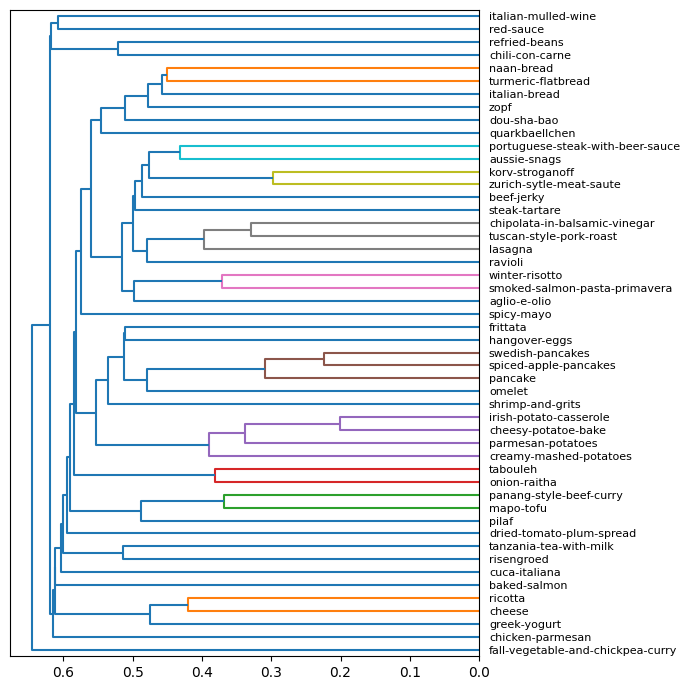

In [208]:
import itertools
import numpy as np

def l1_distance(x, y):
    return np.abs(x - y).sum()

def hac(X, metric=l1_distance):
    """HAC stands for Hierarchical Agglomerative Clustering.

    In this implementation we use minimum linkage criterion.
    """

    # Make sure we're working with a numpy.ndarray and not a pandas.DataFrame
    if isinstance(X, pd.DataFrame):
        X = X.values

    # We will store the clusters in a dictionary of lists
    clusters = {i: [i] for i, _ in enumerate(X)}

    # We will also store the linkage history for plotting purposes
    linkage = []

    # Compute each pairwise distance
    n = len(clusters)
    distances = np.zeros(shape=(n, n)) + np.inf
    for i in range(n):
        for j in range(i+1, n):
            dist = metric(X[i], X[j])
            distances[i, j] = dist
            distances[j, i] = dist

    while len(clusters) > 1:

        # We're looking for the two closest clusters, denoted a and b
        a, b = None, None
        min_dist = np.inf

        for i, j in itertools.combinations(clusters.keys(), 2):

            # Here we will use the minimum linkage criterion: we look for the smallest
            # distance between any two points in both clusters.
            dist = min(metric(X[k], X[l]) for k in clusters[i] for l in clusters[j])

            # Check if the smallest distance is lower than the current lowest distance
            if dist < min_dist:
                a, b = i, j
                min_dist = dist

        # Merge the two closest clusters
        clusters[n] = clusters.pop(a) + clusters.pop(b)

        # Update the linkage matrix
        linkage.append([a, b, min_dist, len(clusters[n])])

        n += 1

    return linkage

sample = projection[:50]
linkage = hac(sample)

fig = plt.figure(figsize=(7, 7))
hierarchy.dendrogram(linkage, labels=sample.index, orientation='left')
plt.tight_layout();
plt.show();
